# Usando outras fontes de dados

In [29]:
%matplotlib inline
import pandas as pd
import nupis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gp
import pysal as ps
import pysal.contrib.viz.mapping as maps
import palettable

pd.options.mode.chained_assignment = None

sns.set(style='whitegrid', palette='bright', context='notebook')

## Tentar usar outra fonte de dados (*shapefiles*)
- [Natural Earth](http://www.naturalearthdata.com/downloads/110m-cultural-vectors)  
- [gadm](http://gadm.org/download) (escolher um país e a opção *shapefile*)

Obs.: informações sobre quaisquer variáveis sobre o país escolhido devem ser buscadas em outras fontes

### Natural Earth

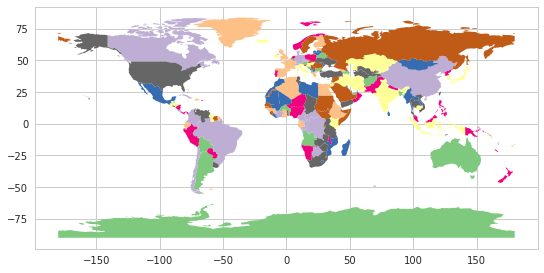

In [30]:
mundi = gp.read_file('ne_110m_admin_0_countries.shp')
mundi.plot(figsize=(9, 9), cmap='Accent', alpha=1);

### GADM - Global Administrative Areas 

País escolhido: Brasil

In [31]:
bra = gp.read_file('BRA_adm2.shp')  # adm0: país, adm1: estados, adm2: municípios

In [32]:
bra.shape

(5504, 15)

In [33]:
bra.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,33,BRA,Brazil,1,Acre,1,Acrelândia,None,0,None,Município,Municipality,None,None,POLYGON ((-67.10585784912104 -9.68811035156244...
1,33,BRA,Brazil,1,Acre,2,Assis Brazil,None,0,None,Município,Municipality,None,None,POLYGON ((-69.66748809814453 -10.9609804153441...
2,33,BRA,Brazil,1,Acre,3,Brasiléia,None,0,None,Município,Municipality,None,None,POLYGON ((-68.99984741210932 -11.0066814422606...
3,33,BRA,Brazil,1,Acre,4,Bujari,None,0,None,Município,Municipality,None,None,POLYGON ((-67.94033813476557 -9.33721923828125...
4,33,BRA,Brazil,1,Acre,5,Capixaba,None,0,None,Município,Municipality,None,None,POLYGON ((-68.03945159912109 -10.3549194335936...


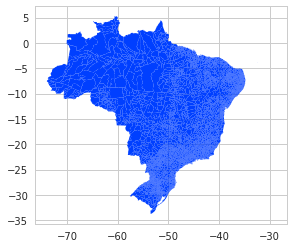

In [34]:
bra.plot();

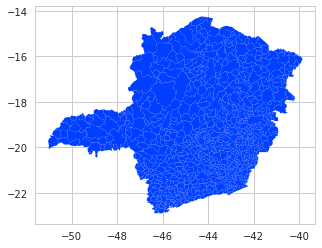

In [35]:
# selecionar MG
bra.query('NAME_1 == "Minas Gerais"').plot();

### Outro país:

Eu gostaria de estudar um outro país e escolhi a Argentina. Por isso, baixei o *shapefile*.

In [36]:
arg = gp.read_file('ARG_adm1.shp')  # admin1 é a divisão em províncias (correspondendo aos nossos estados)

In [37]:
arg.shape

(24, 13)

In [38]:
arg

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,12,ARG,Argentina,1,Buenos Aires,AR.BA,0,None,Provincia,Province,None,Baires|Buenos Ayres,(POLYGON ((-62.79791641235346 -41.027084350585...
1,12,ARG,Argentina,2,Córdoba,AR.CB,0,None,Provincia,Province,None,Cordova,POLYGON ((-63.91582870483393 -29.6175193786620...
2,12,ARG,Argentina,3,Catamarca,AR.CT,0,None,Provincia,Province,None,None,POLYGON ((-67.56227111816406 -25.2601356506347...
3,12,ARG,Argentina,4,Chaco,AR.CC,0,None,Provincia,Province,None,El Chaco|Presidente Juan Peron,POLYGON ((-62.32162094116211 -24.1089553833007...
4,12,ARG,Argentina,5,Chubut,AR.CH,0,None,Provincia,Province,None,None,(POLYGON ((-66.99986267089844 -46.000137329101...
5,12,ARG,Argentina,6,Ciudad de Buenos Aires,AR.DF,0,None,Distrito Federal,Federal District,None,BUENOS AIRES D.F.|Capital Federal|Distretto Fe...,POLYGON ((-58.40380096435536 -34.6646537780760...
6,12,ARG,Argentina,7,Corrientes,AR.CN,0,None,Provincia,Province,None,None,POLYGON ((-58.15141677856445 -27.2689208984375...
7,12,ARG,Argentina,8,Entre Ríos,AR.ER,0,None,Provincia,Province,None,Entre-Rios,(POLYGON ((-58.40124893188477 -33.976806640625...
8,12,ARG,Argentina,9,Formosa,AR.FM,0,None,Provincia,Province,None,None,POLYGON ((-62.28557586669922 -22.5168399810791...
9,12,ARG,Argentina,10,Jujuy,AR.JY,0,None,Provincia,Province,None,None,POLYGON ((-66.22112274169922 -21.7785472869872...


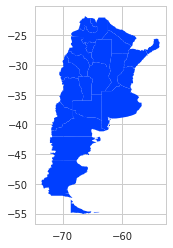

In [39]:
arg.plot();

Paletas disponíveis: [aqui](https://jiffyclub.github.io/palettable/#finding-palettes). 

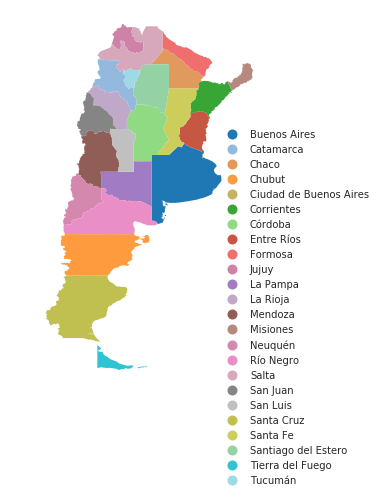

In [40]:
# plotar a Argentina dividindo em províncias
x = palettable.tableau.Tableau_20.mpl_colormap
ax = arg.plot(column='NAME_1',
             linewidth=0, figsize=(7,7), legend=True, cmap=x)
ax.set_axis_off()

leg = ax.get_legend()
leg.set_bbox_to_anchor((1.5, 0.7)); # alterar valores de x e y: posição

Vou utilizar a coluna que contém os nomes das províncias para mesclar com a base de dados sobre o país (que está explicada mais abaixo).
Como os nomes das províncias (coluna 'NAME_1') têm acentos e espaços, usei a função *simplificar_nomes* do nupis para simplificar esses nomes.

In [41]:
nupis.simplificar_nomes(arg, 'NAME_1')

In [42]:
arg

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,12,ARG,Argentina,1,buenos_aires,AR.BA,0,None,Provincia,Province,None,Baires|Buenos Ayres,(POLYGON ((-62.79791641235346 -41.027084350585...
1,12,ARG,Argentina,2,cordoba,AR.CB,0,None,Provincia,Province,None,Cordova,POLYGON ((-63.91582870483393 -29.6175193786620...
2,12,ARG,Argentina,3,catamarca,AR.CT,0,None,Provincia,Province,None,None,POLYGON ((-67.56227111816406 -25.2601356506347...
3,12,ARG,Argentina,4,chaco,AR.CC,0,None,Provincia,Province,None,El Chaco|Presidente Juan Peron,POLYGON ((-62.32162094116211 -24.1089553833007...
4,12,ARG,Argentina,5,chubut,AR.CH,0,None,Provincia,Province,None,None,(POLYGON ((-66.99986267089844 -46.000137329101...
5,12,ARG,Argentina,6,ciudad_de_buenos_aires,AR.DF,0,None,Distrito Federal,Federal District,None,BUENOS AIRES D.F.|Capital Federal|Distretto Fe...,POLYGON ((-58.40380096435536 -34.6646537780760...
6,12,ARG,Argentina,7,corrientes,AR.CN,0,None,Provincia,Province,None,None,POLYGON ((-58.15141677856445 -27.2689208984375...
7,12,ARG,Argentina,8,entre_rios,AR.ER,0,None,Provincia,Province,None,Entre-Rios,(POLYGON ((-58.40124893188477 -33.976806640625...
8,12,ARG,Argentina,9,formosa,AR.FM,0,None,Provincia,Province,None,None,POLYGON ((-62.28557586669922 -22.5168399810791...
9,12,ARG,Argentina,10,jujuy,AR.JY,0,None,Provincia,Province,None,None,POLYGON ((-66.22112274169922 -21.7785472869872...


In [43]:
arg.shape

(24, 13)

Procurei alguma base de dados com informação sobre a população argentina dividida por cidade. O que encontrei foi: https://www.citypopulation.de/php/argentina-admin.php

A partir dessas informações, montei uma planilha que salvei como 'populacao_argentina.csv'.

In [44]:
# carregar arquivo com dados sobre a população da Argentina
pop_arg = pd.read_csv('populacao_argentina.csv')

In [45]:
pop_arg

,prov,abr,status,capital,area,Pop_1980,Pop_1991,Pop_2001,Pop_2010,Pop_2011,Pop_2017
0,Buenos Aires,BA,Prov,La Plata,307571,10865408,12594974,13827203,15625084,15909600,17020000
1,Catamarca,CAT,Prov,Catamarca,102602,207717,264234,334568,367828,3815,4044
2,Chaco,CHA,Prov,Resistencia,99633,701392,839677,984446,1055259,1092600,1168200
3,Chubut,CHU,Prov,Rawson,224686,263116,357189,413237,509108,5242,588
4,Ciudad de Buenos Aires,DF,Dist,Buenos Aires,203,2922829,2965403,2776138,2890151,3033600,3063700
5,Córdoba,CDB,Prov,Córdoba,165321,2407754,2766683,3066801,3308876,3411800,3645300
6,Corrientes,COR,Prov,Corrientes,88199,661454,795594,930991,992595,1028200,1090900
7,Entre Ríos,ERI,Prov,Paraná,78781,908313,1020257,1158147,1235994,1268700,1347500
8,Formosa,FOR,Prov,Formosa,72066,295887,398413,486559,530162,5572,5899
9,Jujuy,JUJ,Prov,San Salvador de Jujuy,53219,410008,512329,611888,673307,6924,7453


A coluna 'prov' contém os nomes das províncias e, para esta coluna coincidir com o *shapefile*, também usei a função 'simplificar_nomes'.

In [46]:
nupis.simplificar_nomes(pop_arg, 'prov')

In [47]:
pop_arg

,prov,abr,status,capital,area,Pop_1980,Pop_1991,Pop_2001,Pop_2010,Pop_2011,Pop_2017
0,buenos_aires,BA,Prov,La Plata,307571,10865408,12594974,13827203,15625084,15909600,17020000
1,catamarca,CAT,Prov,Catamarca,102602,207717,264234,334568,367828,3815,4044
2,chaco,CHA,Prov,Resistencia,99633,701392,839677,984446,1055259,1092600,1168200
3,chubut,CHU,Prov,Rawson,224686,263116,357189,413237,509108,5242,588
4,ciudad_de_buenos_aires,DF,Dist,Buenos Aires,203,2922829,2965403,2776138,2890151,3033600,3063700
5,cordoba,CDB,Prov,Córdoba,165321,2407754,2766683,3066801,3308876,3411800,3645300
6,corrientes,COR,Prov,Corrientes,88199,661454,795594,930991,992595,1028200,1090900
7,entre_rios,ERI,Prov,Paraná,78781,908313,1020257,1158147,1235994,1268700,1347500
8,formosa,FOR,Prov,Formosa,72066,295887,398413,486559,530162,5572,5899
9,jujuy,JUJ,Prov,San Salvador de Jujuy,53219,410008,512329,611888,673307,6924,7453


Agora é necessário mesclar as informações do *shapefile* com o conjunto de dados sobre a população (o arquivo .csv).

Usei a função 'merge' usando as colunas 'NAME_1' (que mudei para 'prov') do *shapefile* e 'prov' do .csv.

In [48]:
df = pop_arg
geodf = arg
geodf.geometry = geodf.geometry.simplify(0.001)
geodf.rename(columns={'NAME_1': 'prov'}, inplace=True)
argentina = pd.merge(geodf, df, on='prov', suffixes=('', '_y'))
argentina.head()

,ID_0,ISO,NAME_0,ID_1,prov,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,...,abr,status,capital,area,Pop_1980,Pop_1991,Pop_2001,Pop_2010,Pop_2011,Pop_2017
0,12,ARG,Argentina,1,buenos_aires,AR.BA,0,None,Provincia,Province,...,BA,Prov,La Plata,307571,10865408,12594974,13827203,15625084,15909600,17020000
1,12,ARG,Argentina,2,cordoba,AR.CB,0,None,Provincia,Province,...,CDB,Prov,Córdoba,165321,2407754,2766683,3066801,3308876,3411800,3645300
2,12,ARG,Argentina,3,catamarca,AR.CT,0,None,Provincia,Province,...,CAT,Prov,Catamarca,102602,207717,264234,334568,367828,3815,4044
3,12,ARG,Argentina,4,chaco,AR.CC,0,None,Provincia,Province,...,CHA,Prov,Resistencia,99633,701392,839677,984446,1055259,1092600,1168200
4,12,ARG,Argentina,5,chubut,AR.CH,0,None,Provincia,Province,...,CHU,Prov,Rawson,224686,263116,357189,413237,509108,5242,588


In [49]:
argentina.shape

(24, 23)

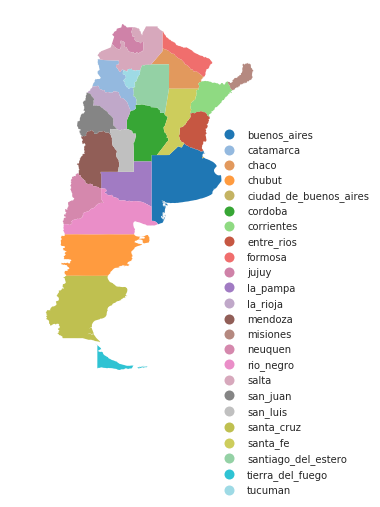

In [50]:
# testar plotar o mapa após a criação do novo objeto geopandas 'argentina'
ax = argentina.plot(column='prov',
             linewidth=0, figsize=(7,7), legend=True, cmap=x)
ax.set_axis_off()

leg = ax.get_legend()
leg.set_bbox_to_anchor((1.5, 0.7)); # alterar valores de x e y: posição

In [51]:
w_arg = ps.queen_from_shapefile('ARG_adm1.shp')   # cria a matriz de vizinhaça no formato queen

/home/patricia/anaconda3/lib/python3.6/site-packages/pysal/weights/weights.py:186: UserWarning: There is one disconnected observation (no neighbors)
  warnings.warn("There is one disconnected observation (no neighbors)")
/home/patricia/anaconda3/lib/python3.6/site-packages/pysal/weights/weights.py:187: UserWarning: Island id: 22
  warnings.warn("Island id: %s" % str(self.islands[0]))


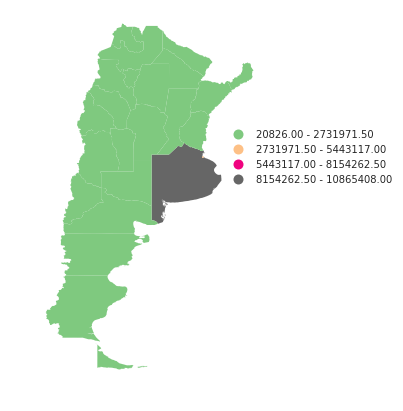

In [52]:
# mapa temático da população em 1980
ax = argentina.plot(column='Pop_1980', scheme='equal_interval', k=4,
             linewidth=0, figsize=(7,7), legend=True, cmap='Accent')
ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.6, 0.7));

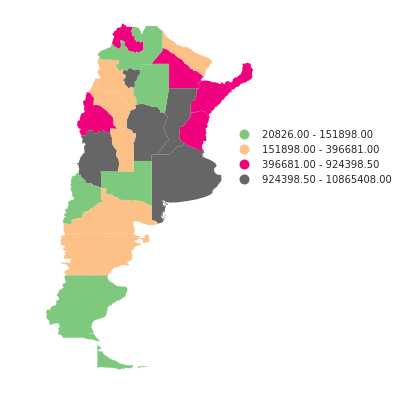

In [53]:
# mapa temático da população em 1980
ax = argentina.plot(column='Pop_1980', scheme='quantiles', k=4,
             linewidth=0, figsize=(7,7), legend=True, cmap='Accent')
ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.6, 0.7));

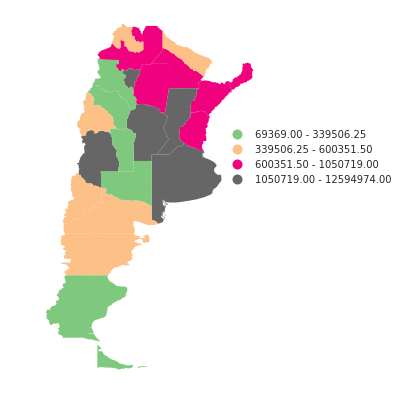

In [54]:
# mapa temático da população em 1991
ax = argentina.plot(column='Pop_1991', scheme='quantiles', k=4,
             linewidth=0, figsize=(7,7), legend=True, cmap='Accent')
ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.6, 0.7));

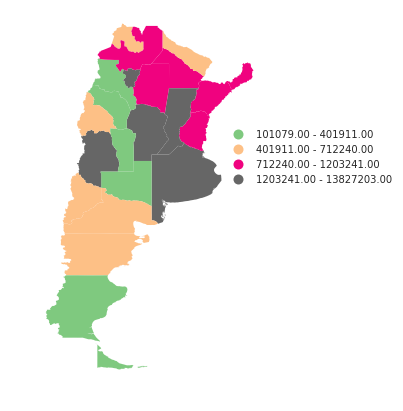

In [55]:
# mapa temático da população em 2001
ax = argentina.plot(column='Pop_2001', scheme='quantiles', k=4,
             linewidth=0, figsize=(7,7), legend=True, cmap='Accent')
ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.6, 0.7));

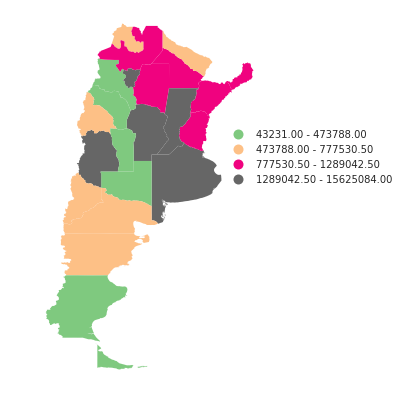

In [56]:
# mapa temático da população em 2010
ax = argentina.plot(column='Pop_2010', scheme='quantiles', k=4,
             linewidth=0, figsize=(7,7), legend=True, cmap='Accent')
ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.6, 0.7));

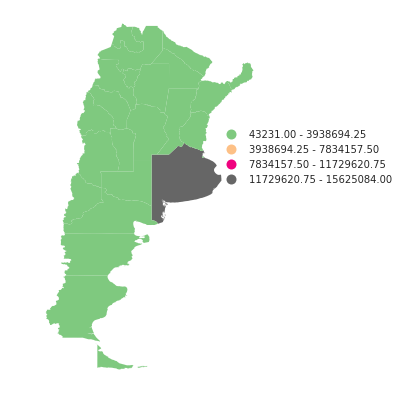

In [57]:
# mapa temático da população em 2010
ax = argentina.plot(column='Pop_2010', scheme='equal_interval', k=4,
             linewidth=0, figsize=(7,7), legend=True, cmap='Accent')
ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.6, 0.7));

In [58]:
IM = ps.Moran(argentina.Pop_2010, w_arg)  # variável no dataframe e matriz de vizinhança 
nupis.moran_resumo(IM)         # função do nupis que retorna uma saída organizada do I de Moran

('WARNING: ', 22, ' is an island (no neighbors)')
Moran Rate Summary Report
I        0.131   observed value of Moran’s I
EI_sim   -0.043   average value of I from permutations  
p_sim     0.039   p-value based on permutations


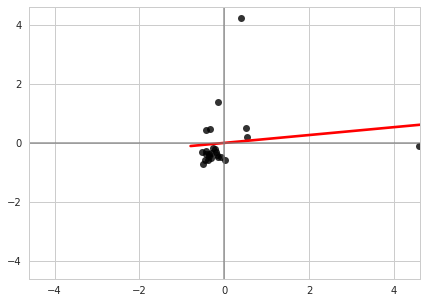

In [59]:
nupis.moran_dispersao(IM)   # diagrama de dispersão de Moran que recebe o objeto criado antes

### Mapas LISA

/home/patricia/anaconda3/lib/python3.6/site-packages/pysal/weights/weights.py:186: UserWarning: There is one disconnected observation (no neighbors)
  warnings.warn("There is one disconnected observation (no neighbors)")
/home/patricia/anaconda3/lib/python3.6/site-packages/pysal/weights/weights.py:187: UserWarning: Island id: 22
  warnings.warn("Island id: %s" % str(self.islands[0]))
/home/patricia/anaconda3/lib/python3.6/site-packages/pysal/esda/moran.py:851: RuntimeWarning: invalid value encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/home/patricia/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/patricia/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/patricia/anaconda3/lib/python3.6/site-packages/scip

('WARNING: ', 22, ' is an island (no neighbors)')


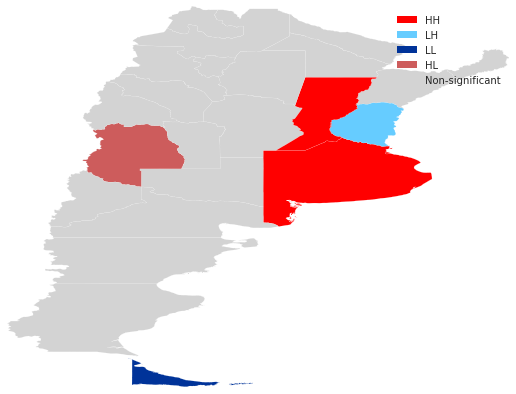

In [60]:
nupis.lisa_mapa(argentina.Pop_2010, 'ARG_adm1.shp', p_thres=0.05)   # função do nupis para obter o mapa LISA

In [61]:
shapefile = 'ARG_adm1.shp'
w = ps.queen_from_shapefile(shapefile)
lisa = ps.Moran_Local(argentina.Pop_2010, w)
p_thres = 0.05

('WARNING: ', 22, ' is an island (no neighbors)')


/home/patricia/anaconda3/lib/python3.6/site-packages/pysal/weights/weights.py:186: UserWarning: There is one disconnected observation (no neighbors)
  warnings.warn("There is one disconnected observation (no neighbors)")
/home/patricia/anaconda3/lib/python3.6/site-packages/pysal/weights/weights.py:187: UserWarning: Island id: 22
  warnings.warn("Island id: %s" % str(self.islands[0]))
/home/patricia/anaconda3/lib/python3.6/site-packages/pysal/esda/moran.py:851: RuntimeWarning: invalid value encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/home/patricia/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/patricia/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/patricia/anaconda3/lib/python3.6/site-packages/scip

In [62]:
import numpy as np
lisa.p_sim  # pseudovalores do LISA
sig = lisa.p_sim < 0.05  # identificar significativos
lisa.p_sim[sig]
posicoes = np.where(sig)
argentina['quad'] = lisa.q
prov_sig = argentina.loc[posicoes[0], ['prov', 'quad']]
prov_escolhidas = argentina.iloc[prov_sig.index, :]

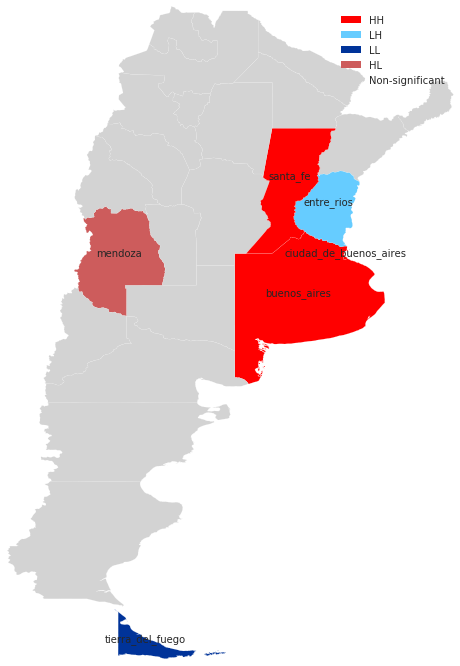

In [63]:
# plotar os nomes dos clusters e outliers espaciais 
fig = plt.figure(figsize=(8, 12))
shp = ps.open(shapefile)
base = maps.map_poly_shp(shp)
base = maps.base_lisa_cluster(base, lisa, p_thres=p_thres)
base.set_edgecolor('1')
base.set_linewidth(0.1)
ax = maps.setup_ax([base], [shp.bbox])

boxes, labels = maps.lisa_legend_components(lisa, p_thres=p_thres)
plt.legend(boxes, labels, fancybox=True)

for i in prov_escolhidas.index:

    plt.text(prov_escolhidas.geometry.centroid[i].coords[0][0], prov_escolhidas.geometry.centroid[i].coords[0][1], 
             prov_escolhidas.prov[i],
             fontsize=10, horizontalalignment='center', verticalalignment='bottom')

**Tarefas:**

- no site gadm: escolher outro país e plotar seu mapa  